# Slide 26: Chi-Square Test - School Lunch Survey
## Simple Explanation + Quick Real-World Example

Do older kids really eat healthier lunch than younger kids? The Chi-Square test helps us find out if patterns in categories are real or just coincidence!

## Setup and Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

print("🍕 Chi-Square Test Made Simple!")
print("=" * 35)

🍕 Chi-Square Test Made Simple!


---
## 🍕 Simple Explanation: School Lunch Survey

**The Question:** Do older students choose healthier lunch options more often than younger students?

🍽️ SCENARIO: Middle School Lunch Survey
We surveyed 300 students about their lunch choices...



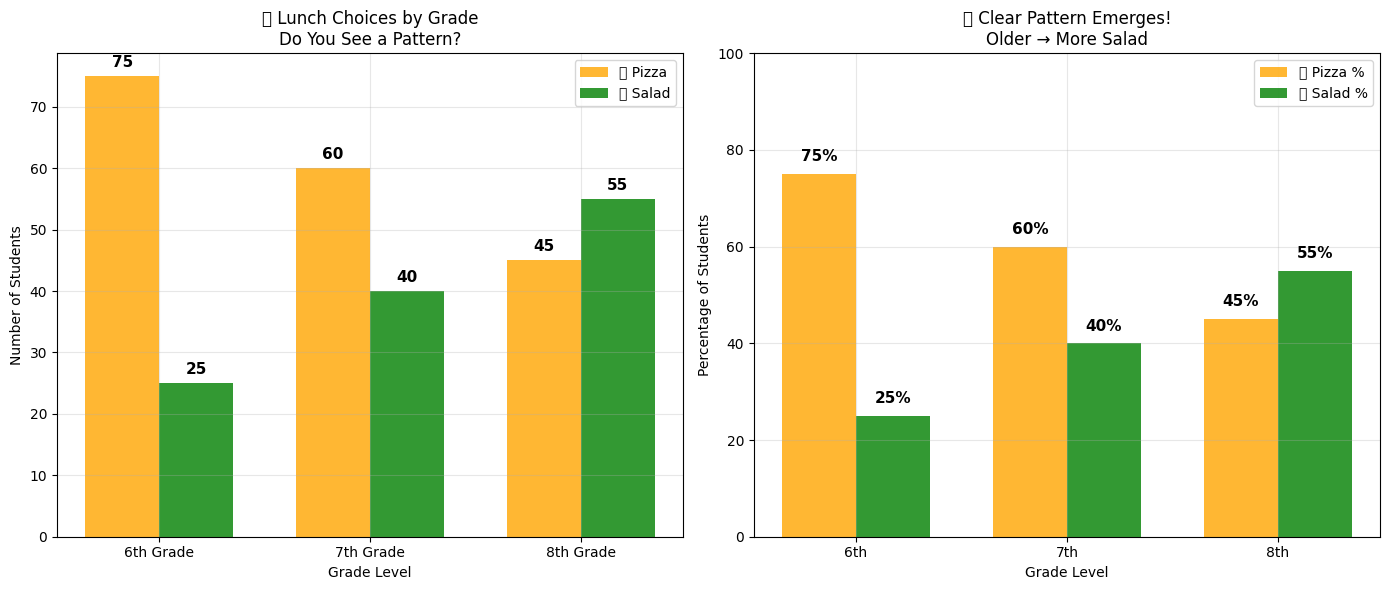

🤔 THE BIG QUESTION:
Is this pattern REAL, or could it just be random chance?

📊 WHAT WE OBSERVE:
• 6th graders: 25% choose salad
• 7th graders: 40% choose salad
• 8th graders: 55% choose salad

🧮 Chi-Square test will tell us if this is statistically significant!


In [2]:
def school_lunch_demo():
    """Simple demonstration of Chi-Square test concept"""
    
    print("🍽️ SCENARIO: Middle School Lunch Survey")
    print("We surveyed 300 students about their lunch choices...\n")
    
    # Create the data
    data = {
        'Grade': ['6th']*100 + ['7th']*100 + ['8th']*100,
        'Choice': (['Pizza']*75 + ['Salad']*25) +     # 6th: 75% pizza
                 (['Pizza']*60 + ['Salad']*40) +     # 7th: 60% pizza  
                 (['Pizza']*45 + ['Salad']*55)       # 8th: 45% pizza
    }
    
    df = pd.DataFrame(data)
    contingency = pd.crosstab(df['Grade'], df['Choice'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar chart showing the pattern
    pizza_counts = [75, 60, 45]
    salad_counts = [25, 40, 55]
    grades = ['6th Grade', '7th Grade', '8th Grade']
    
    x = np.arange(len(grades))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, pizza_counts, width, label='🍕 Pizza', 
                   color='orange', alpha=0.8)
    bars2 = ax1.bar(x + width/2, salad_counts, width, label='🥗 Salad', 
                   color='green', alpha=0.8)
    
    ax1.set_xlabel('Grade Level')
    ax1.set_ylabel('Number of Students')
    ax1.set_title('🍽️ Lunch Choices by Grade\nDo You See a Pattern?')
    ax1.set_xticks(x)
    ax1.set_xticklabels(grades)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars1 + bars2, pizza_counts + salad_counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{count}', ha='center', va='bottom', fontsize=11, weight='bold')
    
    # Show percentages for clarity
    pizza_pcts = [75, 60, 45]
    salad_pcts = [25, 40, 55]
    
    bars3 = ax2.bar(x - width/2, pizza_pcts, width, label='🍕 Pizza %', 
                   color='orange', alpha=0.8)
    bars4 = ax2.bar(x + width/2, salad_pcts, width, label='🥗 Salad %', 
                   color='green', alpha=0.8)
    
    ax2.set_xlabel('Grade Level')
    ax2.set_ylabel('Percentage of Students')
    ax2.set_title('📊 Clear Pattern Emerges!\nOlder → More Salad')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['6th', '7th', '8th'])
    ax2.legend()
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3)
    
    # Add percentage labels
    for bar, pct in zip(bars3 + bars4, pizza_pcts + salad_pcts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                f'{pct}%', ha='center', va='bottom', fontsize=11, weight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # The key question
    print("🤔 THE BIG QUESTION:")
    print("Is this pattern REAL, or could it just be random chance?")
    print("\n📊 WHAT WE OBSERVE:")
    print("• 6th graders: 25% choose salad")
    print("• 7th graders: 40% choose salad")
    print("• 8th graders: 55% choose salad")
    print("\n🧮 Chi-Square test will tell us if this is statistically significant!")
    
    return contingency

lunch_table = school_lunch_demo()

---
## 🧮 Running the Chi-Square Test

Let's test if grade level and lunch choice are really related!

In [3]:
def run_chi_square_test(contingency_table):
    """Perform and explain Chi-Square test"""
    
    print("🧪 RUNNING THE CHI-SQUARE TEST")
    print("=" * 40)
    
    # Show the contingency table
    print("📋 Our Data (Contingency Table):")
    print(contingency_table)
    print()
    
    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Show expected values
    print("🎯 Expected Values (if NO relationship):")
    expected_df = pd.DataFrame(expected, 
                              columns=['Pizza', 'Salad'], 
                              index=['6th', '7th', '8th'])
    print(expected_df.round(1))
    print()
    
    # Show test results
    print("📊 TEST RESULTS:")
    print(f"Chi-square statistic: {chi2_stat:.3f}")
    print(f"P-value: {p_value:.6f}")
    print(f"Degrees of freedom: {dof}")
    print()
    
    # Interpret results
    alpha = 0.05
    if p_value < alpha:
        print("🎉 RESULT: SIGNIFICANT RELATIONSHIP FOUND!")
        print(f"✅ P-value ({p_value:.6f}) < 0.05")
        print("✅ Grade level and lunch choice ARE related")
        print("✅ Older students DO choose healthier options more often")
        print("✅ This pattern is very unlikely to be just chance")
    else:
        print("❌ RESULT: NO SIGNIFICANT RELATIONSHIP")
        print(f"P-value ({p_value:.6f}) >= 0.05")
        print("The differences could be due to random chance")
    
    return chi2_stat, p_value

chi2, p_val = run_chi_square_test(lunch_table)

🧪 RUNNING THE CHI-SQUARE TEST
📋 Our Data (Contingency Table):
Choice  Pizza  Salad
Grade               
6th        75     25
7th        60     40
8th        45     55

🎯 Expected Values (if NO relationship):
     Pizza  Salad
6th   60.0   40.0
7th   60.0   40.0
8th   60.0   40.0

📊 TEST RESULTS:
Chi-square statistic: 18.750
P-value: 0.000085
Degrees of freedom: 2

🎉 RESULT: SIGNIFICANT RELATIONSHIP FOUND!
✅ P-value (0.000085) < 0.05
✅ Grade level and lunch choice ARE related
✅ Older students DO choose healthier options more often
✅ This pattern is very unlikely to be just chance


---
## 💼 Real-World Example: Marketing Campaign Response

**Business Question:** Do different age groups respond differently to our email campaign?

📧 BUSINESS SCENARIO: Email Campaign Analysis
📊 Campaign Results:
       Responded  Did Not Respond
18-30         64              736
31-45        150              850
46-60        132              468
60+           48              352



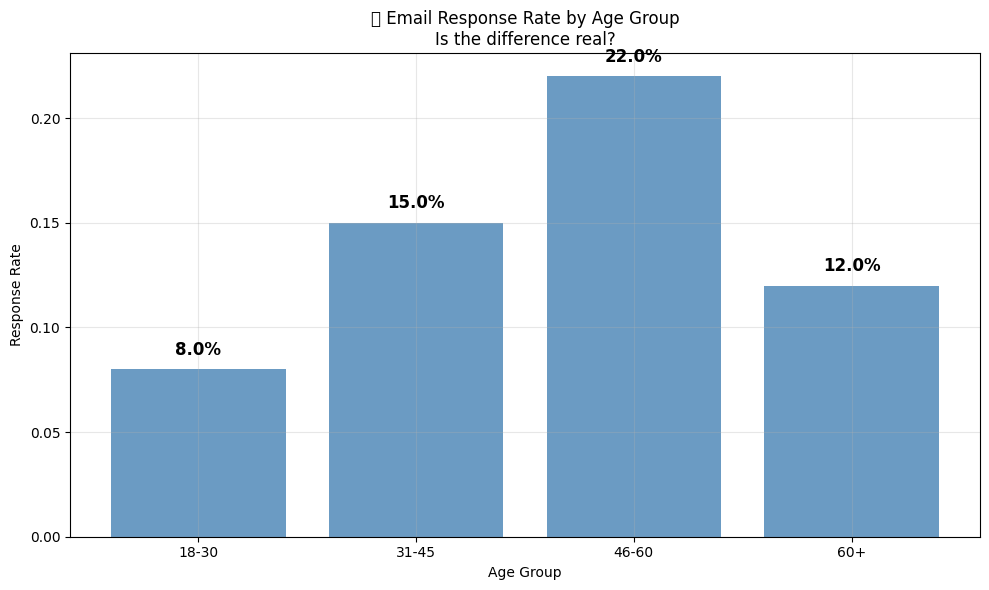

🧮 Chi-Square Test Results:
Chi-square statistic: 57.715
P-value: 0.00000000

💡 BUSINESS CONCLUSION: Age DOES affect response rates!
📈 RECOMMENDATIONS:
  • Focus budget on 46-60 age group (highest response: 22.0%)
  • Create age-specific messaging strategies
  • Consider different channels for different ages


In [4]:
def marketing_campaign_example():
    """Quick business application of Chi-Square test"""
    
    print("📧 BUSINESS SCENARIO: Email Campaign Analysis")
    print("=" * 50)
    
    # Create realistic campaign data
    np.random.seed(42)
    age_groups = ['18-30', '31-45', '46-60', '60+']
    sample_sizes = [800, 1000, 600, 400]
    response_rates = [0.08, 0.15, 0.22, 0.12]  # Middle-aged respond more
    
    responses = []
    no_responses = []
    
    for size, rate in zip(sample_sizes, response_rates):
        responded = int(size * rate)
        responses.append(responded)
        no_responses.append(size - responded)
    
    # Create campaign results
    campaign_data = pd.DataFrame({
        'Responded': responses,
        'Did Not Respond': no_responses
    }, index=age_groups)
    
    print("📊 Campaign Results:")
    print(campaign_data)
    print()
    
    # Show response rates
    response_rates_actual = [r/(r+nr) for r, nr in zip(responses, no_responses)]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(age_groups, response_rates_actual, color='steelblue', alpha=0.8)
    ax.set_title('📈 Email Response Rate by Age Group\nIs the difference real?')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Response Rate')
    ax.grid(True, alpha=0.3)
    
    # Add percentage labels
    for bar, rate in zip(bars, response_rates_actual):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{rate:.1%}', ha='center', va='bottom', fontsize=12, weight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Run Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(campaign_data.values)
    
    print(f"🧮 Chi-Square Test Results:")
    print(f"Chi-square statistic: {chi2_stat:.3f}")
    print(f"P-value: {p_value:.8f}")
    
    if p_value < 0.05:
        print("\n💡 BUSINESS CONCLUSION: Age DOES affect response rates!")
        print("📈 RECOMMENDATIONS:")
        print(f"  • Focus budget on 46-60 age group (highest response: {max(response_rates_actual):.1%})")
        print(f"  • Create age-specific messaging strategies")
        print(f"  • Consider different channels for different ages")
    else:
        print("\n📊 BUSINESS CONCLUSION: No significant age effect")
        print("💡 RECOMMENDATION: Use same strategy across all age groups")

marketing_campaign_example()

---
## 🎮 Quick Chi-Square Calculator

Test your own 2x2 data!

In [5]:
def quick_chi_square_test(group1_yes, group1_no, group2_yes, group2_no, 
                         group1_name="Group 1", group2_name="Group 2"):
    """Simple 2x2 Chi-Square test calculator"""
    
    # Create contingency table
    table = np.array([[group1_yes, group1_no],
                     [group2_yes, group2_no]])
    
    print(f"🧮 TESTING: {group1_name} vs {group2_name}")
    print("=" * 40)
    
    # Show the data
    df = pd.DataFrame(table, 
                     columns=['Yes', 'No'],
                     index=[group1_name, group2_name])
    print("📋 Your Data:")
    print(df)
    
    # Calculate percentages
    total1 = group1_yes + group1_no
    total2 = group2_yes + group2_no
    pct1 = (group1_yes / total1) * 100
    pct2 = (group2_yes / total2) * 100
    
    print(f"\n📊 Success Rates:")
    print(f"{group1_name}: {pct1:.1f}% ({group1_yes}/{total1})")
    print(f"{group2_name}: {pct2:.1f}% ({group2_yes}/{total2})")
    print(f"Difference: {abs(pct1-pct2):.1f} percentage points")
    
    # Run test
    chi2_stat, p_value, dof, expected = chi2_contingency(table)
    
    print(f"\n🧪 Test Results:")
    print(f"Chi-square: {chi2_stat:.3f}")
    print(f"P-value: {p_value:.4f}")
    
    # Conclusion
    if p_value < 0.05:
        print(f"\n✅ SIGNIFICANT DIFFERENCE FOUND!")
        print(f"The groups really do differ (p < 0.05)")
    else:
        print(f"\n❌ No significant difference")
        print(f"Difference could be due to chance (p >= 0.05)")

# Example 1: A/B Test
print("🎮 EXAMPLE 1: Website A/B Test")
quick_chi_square_test(120, 880, 150, 850, "Version A", "Version B")

print("\n" + "="*50)
print("🎮 EXAMPLE 2: Gender and Product Preference")
quick_chi_square_test(60, 40, 30, 70, "Women", "Men")

print("\n" + "="*50)
print("🎮 TRY YOUR OWN DATA:")
print("Modify the numbers in the cell below!")

🎮 EXAMPLE 1: Website A/B Test
🧮 TESTING: Version A vs Version B
📋 Your Data:
           Yes   No
Version A  120  880
Version B  150  850

📊 Success Rates:
Version A: 12.0% (120/1000)
Version B: 15.0% (150/1000)
Difference: 3.0 percentage points

🧪 Test Results:
Chi-square: 3.601
P-value: 0.0577

❌ No significant difference
Difference could be due to chance (p >= 0.05)

🎮 EXAMPLE 2: Gender and Product Preference
🧮 TESTING: Women vs Men
📋 Your Data:
       Yes  No
Women   60  40
Men     30  70

📊 Success Rates:
Women: 60.0% (60/100)
Men: 30.0% (30/100)
Difference: 30.0 percentage points

🧪 Test Results:
Chi-square: 16.990
P-value: 0.0000

✅ SIGNIFICANT DIFFERENCE FOUND!
The groups really do differ (p < 0.05)

🎮 TRY YOUR OWN DATA:
Modify the numbers in the cell below!


In [6]:
# 🎮 TEST YOUR OWN 2x2 DATA!
# Format: quick_chi_square_test(group1_yes, group1_no, group2_yes, group2_no, "Group1", "Group2")

quick_chi_square_test(45, 55, 65, 35, "Treatment", "Control")

# Try these examples by uncommenting:
# quick_chi_square_test(80, 20, 70, 30, "Morning", "Evening")
# quick_chi_square_test(25, 75, 25, 75, "Same Results", "Same Results 2")

🧮 TESTING: Treatment vs Control
📋 Your Data:
           Yes  No
Treatment   45  55
Control     65  35

📊 Success Rates:
Treatment: 45.0% (45/100)
Control: 65.0% (65/100)
Difference: 20.0 percentage points

🧪 Test Results:
Chi-square: 7.293
P-value: 0.0069

✅ SIGNIFICANT DIFFERENCE FOUND!
The groups really do differ (p < 0.05)


---
## 🎯 Quick Summary

**When to use Chi-Square test:**
- ✅ Categorical data (pizza vs salad, yes vs no)
- ✅ Want to test if two categories are related
- ✅ Have enough data (at least 5 in each cell)

**How to interpret:**
- 📊 P-value < 0.05 → Significant relationship exists
- 📊 P-value ≥ 0.05 → No significant relationship

**Business applications:**
- 🎯 A/B testing (version A vs B)
- 👥 Customer segmentation (demographics vs behavior)
- 📊 Market research (preferences by groups)
- 📈 Campaign effectiveness (response by channels)

**Remember:** Chi-Square tells you IF there's a relationship, but not HOW STRONG it is!